## Comparing code
---

In [16]:
# modules to compare
import hwi_igraph_testing_main as ig
import igraph_testing_main as ig2


In [21]:
# single file comparison
targetFileName = '4x3x2'    
#failed descriptors only
failonly = False

In [26]:
########################################  readme  #####################################
# comparing the descriptors between new version and old version
# you can change targetFileName variable(line 25) to run the code with different file
# if the descriptors are the same, then you can see OK and value
#######################################################################################

import importlib
import descriptors as ds
import os
import time
import matplotlib.pyplot as plt
import tracemalloc

importlib.reload(ig)
importlib.reload(ig2)
importlib.reload(ds)

current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/p1descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon = 1e-5

loop_cnt = 1

def run_test(lib, test_file):
    total_graph_time = 0
    tracemalloc.start()
    graph_start = time.time()
    g, *_ = lib.generateGraph(data_path + test_file + ".txt")
    _stats = tracemalloc.get_traced_memory()
    graph_end = time.time()
    tracemalloc.stop()

    graph_mem = _stats[1] - _stats[0]
    stats = ds.desciptors(g)
    graph_time = graph_end - graph_start
    return stats, graph_time, graph_mem

# Run and compare for both ig and ig2
def test(singlefileonly):
    for test_file in test_files:
        if singlefileonly == True and targetFileName not in test_file:
                continue

        print(f"--- {test_file} ---")

        # Run for ig
        stats_ig, time_ig, mem_ig = run_test(ig, test_file)

        # Run for ig2
        stats_ig2, time_ig2, mem_ig2 = run_test(ig2, test_file)

        print("\n[Descriptor Comparison]")

        with open(descriptors_path + "p1descriptors." + test_file + ".log") as f:
            for line in f:
                stat = line.strip().split(" ")
                try:
                    # if stats.get(stat[0], -1) == int(stat[1]):
                    if failonly == False and abs(stats_ig.get(stat[0], -1) - float(stat[1])) < epsilon:
                        print(f"new {stat[0]} passed")
                    elif stats_ig.get(stat[0], -1) != -1 and stats_ig.get(stat[0], -1) != int(stat[1]):
                        print(f"new {stat[0]} failed - {stats_ig.get(stat[0])} is not the same as expected {stat[1]}")

                    if failonly == False and abs(stats_ig2.get(stat[0], -1) - float(stat[1])) < epsilon:
                        print(f"prev {stat[0]} passed")
                    elif stats_ig2.get(stat[0], -1) != -1 and stats_ig2.get(stat[0], -1) != int(stat[1]):
                        print(f"prev {stat[0]} failed - {stats_ig2.get(stat[0])} is not the same as expected {stat[1]}")
                    # print("-----------------")

                except ValueError:
                    if failonly == False and abs(stats_ig.get(stat[0], -1) - float(stat[1])) < epsilon:
                        print(f"new {stat[0]} passed")
                    elif stats_ig.get(stat[0], -1) != -1 and stats_ig.get(stat[0], -1) != float(stat[1]):
                        print(f"new {stat[0]} failed - {stats_ig.get(stat[0])} is not the same as expected {stat[1]}")

                    if failonly == False and abs(stats_ig2.get(stat[0], -1) - float(stat[1])) < epsilon:
                        print(f"prev {stat[0]} passed")
                    elif stats_ig2.get(stat[0], -1) != -1 and stats_ig2.get(stat[0], -1) != float(stat[1]):
                        print(f"prev {stat[0]} failed - {stats_ig.get(stat[0])} is not the same as expected {stat[1]}")
                    # print("-----------------")


        # Time and memory comparison
        # print("\n[Performance Comparison]")
        # print(f"Graph Generation Time - new: {time_ig:.6f}s, prev: {time_ig2:.6f}s")
        # print(f"Graph Memory Usage     - new: {mem_ig} bytes, prev: {mem_ig2} bytes")
        # print(f"Descriptor Time        - new: {stats_ig['time']:.6f}s, prev: {stats_ig2['time']:.6f}s")
        # print(f"Descriptor Memory      - new: {stats_ig['mem']} bytes, prev: {stats_ig2['mem']} bytes")
        print()



In [27]:
#single file comparision
test(singlefileonly=True)

--- data_4x3x2 ---

[Descriptor Comparison]
new STAT_n passed
prev STAT_n passed
new STAT_e failed - 22 is not the same as expected 24
prev STAT_e failed - 22 is not the same as expected 24
new STAT_n_D passed
prev STAT_n_D passed
new STAT_n_A passed
prev STAT_n_A passed
new STAT_CC_D passed
prev STAT_CC_D passed
new STAT_CC_A passed
prev STAT_CC_A passed
new STAT_CC_D_An passed
prev STAT_CC_D_An passed
new STAT_CC_A_Ca passed
prev STAT_CC_A_Ca passed
new ABS_f_D passed
prev ABS_f_D passed
new CT_f_conn_D_An passed
prev CT_f_conn_D_An passed
new CT_f_conn_A_Ca passed
prev CT_f_conn_A_Ca passed
new CT_n_D_adj_An failed - 6 is not the same as expected 7
prev CT_n_D_adj_An failed - 6 is not the same as expected 7
new CT_n_A_adj_Ca failed - 6 is not the same as expected 7
prev CT_n_A_adj_Ca failed - 6 is not the same as expected 7



In [20]:
#all file comparision
test(singlefileonly=False)

--- testFile-100-2D ---

[Descriptor Comparison]
new CT_n_D_adj_An failed - 0 is not the same as expected 1
prev CT_n_D_adj_An failed - 0 is not the same as expected 1
new CT_n_A_adj_Ca failed - 0 is not the same as expected 1
prev CT_n_A_adj_Ca failed - 0 is not the same as expected 1

--- data_0.528_3.8_000160 ---

[Descriptor Comparison]

--- morphology_resize_0.25x ---

[Descriptor Comparison]
new CT_n_D_adj_An failed - 48 is not the same as expected 49
prev CT_n_D_adj_An failed - 48 is not the same as expected 49
new CT_n_A_adj_Ca failed - 29 is not the same as expected 30
prev CT_n_A_adj_Ca failed - 29 is not the same as expected 30

--- morphology_resize_4.0x ---


KeyboardInterrupt: 

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from collections import defaultdict

def format_number(value):
    if value >= 1_000_000:
        return f'{value/1_000_000:.1f}M'
    elif value >= 1_000:
        return f'{value/1_000:.1f}K'
    return f'{value:.0f}'

def group_files_by_pattern(files):
    pattern_groups = defaultdict(list)
    for file in files:
        pattern = re.sub(r'\d+(?:\.\d+)?', '#', file)  # substitute integers and decimals with '#'
        pattern_groups[pattern].append(file)
    return pattern_groups

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict

def extract_numbers(filename):
    """ 파일명에서 숫자를 추출하여 정렬을 위한 키를 생성 """
    return tuple(map(int, re.findall(r'\d+', filename)))


def plot_total_execution_and_memory_compare(csv_file1, csv_file2):
    df1 = pd.read_csv(csv_file1)
    df2 = pd.read_csv(csv_file2)
    
    df1['total_execution_time'] = df1['descriptor_time'] + df1['graph_time']
    df1['peak_memory_usage'] = df1[['graph_mem', 'descriptor_mem']].max(axis=1)
    
    df2['total_execution_time'] = df2['descriptor_time'] + df2['graph_time']
    df2['peak_memory_usage'] = df2[['graph_mem', 'descriptor_mem']].max(axis=1)
    
    pattern_groups = group_files_by_pattern(df1['Test File'])
    
    for pattern, files in pattern_groups.items():
        subset1 = df1[df1['Test File'].isin(files)].copy()
        subset2 = df2[df2['Test File'].isin(files)].copy()
        
        subset1['sort_key'] = subset1['Test File'].apply(extract_numbers)
        subset2['sort_key'] = subset2['Test File'].apply(extract_numbers)
        subset1.sort_values('sort_key', inplace=True)
        subset2.sort_values('sort_key', inplace=True)
        
        sorted_test_files = sorted(files, key=extract_numbers)
        
        plt.figure(figsize=(12, 10))
        
        ax1 = plt.subplot(2, 1, 1)
        ax1.plot(sorted_test_files, subset1['total_execution_time'], marker='o', linestyle='-', color='blue', label=f'{csv_file1} Execution Time')
        ax1.plot(sorted_test_files, subset2['total_execution_time'], marker='o', linestyle='-', color='red', label=f'{csv_file2} Execution Time')
        plt.xlabel('Test Files')
        plt.ylabel('Time (s)')
        plt.title(f'Total Execution Time Comparison - {pattern}')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(True)
        
        ax2 = plt.subplot(2, 1, 2)
        ax2.plot(sorted_test_files, subset1['peak_memory_usage'], marker='s', linestyle='-', color='green', label=f'{csv_file1} Memory Usage')
        ax2.plot(sorted_test_files, subset2['peak_memory_usage'], marker='s', linestyle='-', color='purple', label=f'{csv_file2} Memory Usage')
        plt.xlabel('Test Files')
        plt.ylabel('Memory Usage (bytes)')
        plt.title(f'Peak Memory Usage Comparison - {pattern}')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout(pad=2.0)
        plt.show()


def plot_stepwise_execution_and_memory_compare(csv_file1, csv_file2):
    df1 = pd.read_csv(csv_file1)
    df2 = pd.read_csv(csv_file2)
    
    pattern_groups = group_files_by_pattern(df1['Test File'])
    
    for pattern, files in pattern_groups.items():
        subset1 = df1[df1['Test File'].isin(files)].copy()
        subset2 = df2[df2['Test File'].isin(files)].copy()
        subset1['size'] = subset1['Test File'].str.extract(r'(\d+)').astype(float)
        subset2['size'] = subset2['Test File'].str.extract(r'(\d+)').astype(float)
        subset1.sort_values('size', inplace=True)
        subset2.sort_values('size', inplace=True)
        
        num_files = len(subset1)
        cols = 2
        rows = num_files  
        
        fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4), squeeze=False)
        
        bar_width = 0.4
        
        for i, ((_, row1), (_, row2)) in enumerate(zip(subset1.iterrows(), subset2.iterrows())):
            row_idx = i  
            col_idx = 0  
            
            ax_time = axes[row_idx, col_idx]
            x = np.array([0, 1])  
            times1 = [row1['graph_time'], row1['descriptor_time']]
            times2 = [row2['graph_time'], row2['descriptor_time']]
            
            ax_time.bar(x - 0.2, times1, bar_width, color=['blue', 'red'], label=csv_file1)
            ax_time.bar(x + 0.2, times2, bar_width, color=['cyan', 'orange'], label=csv_file2)
            
            ax_time.set_xticks(x)
            ax_time.set_xticklabels(['Graph', 'Descriptor'])
            ax_time.set_title(f'Time - {row1["Test File"]}')
            ax_time.set_ylabel('Time (s)')
            ax_time.legend()
            ax_time.grid(True)
            
            col_idx = 1  
            ax_mem = axes[row_idx, col_idx]
            mems1 = [row1['graph_mem'], row1['descriptor_mem']]
            mems2 = [row2['graph_mem'], row2['descriptor_mem']]
            
            ax_mem.bar(x - 0.2, mems1, bar_width, color=['green', 'purple'], label=csv_file1)
            ax_mem.bar(x + 0.2, mems2, bar_width, color=['lightgreen', 'pink'], label=csv_file2)
            
            ax_mem.set_xticks(x)
            ax_mem.set_xticklabels(['Graph', 'Descriptor'])
            ax_mem.set_title(f'Memory - {row1["Test File"]}')
            ax_mem.set_ylabel('Memory Usage (bytes)')
            ax_mem.legend()
            ax_mem.grid(True)
        
        plt.tight_layout()
        plt.show()


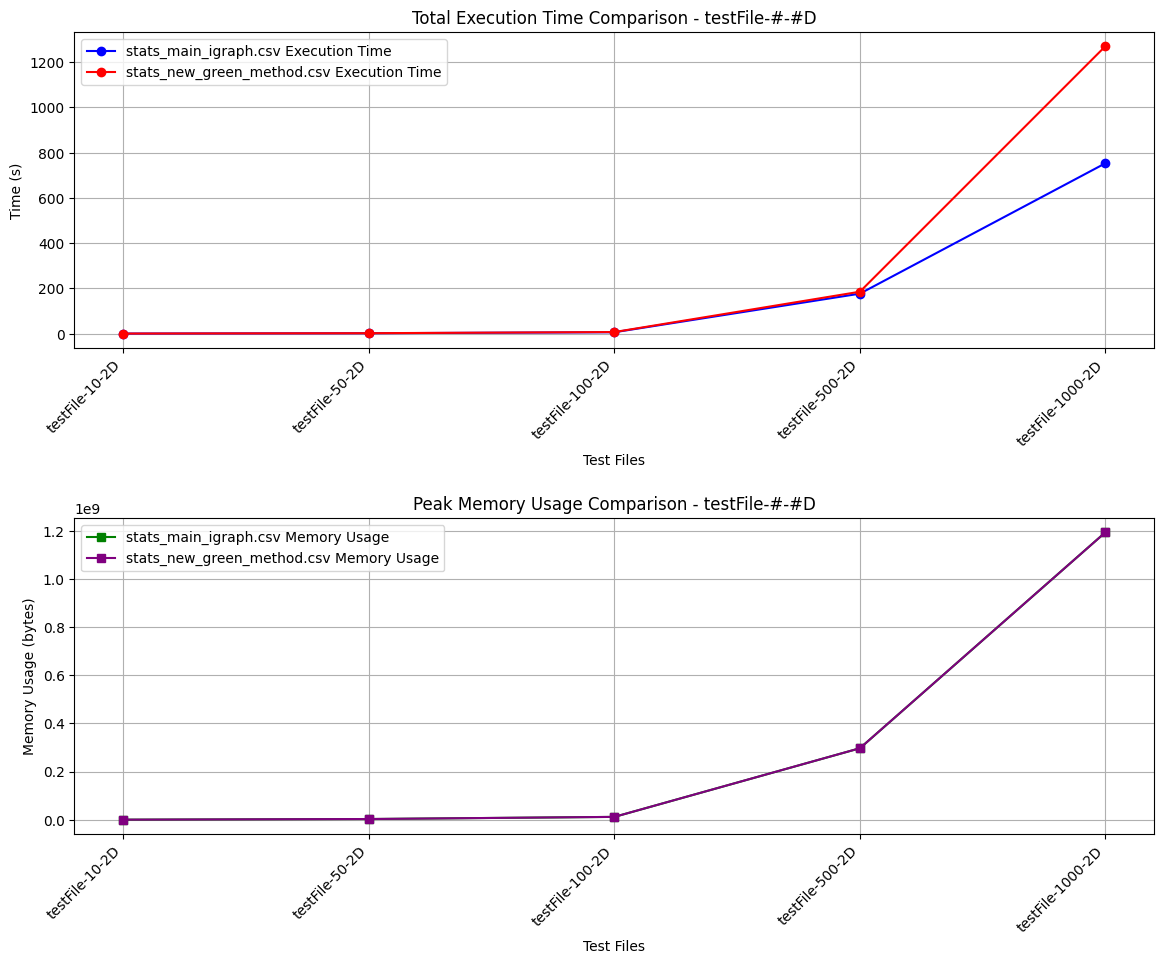

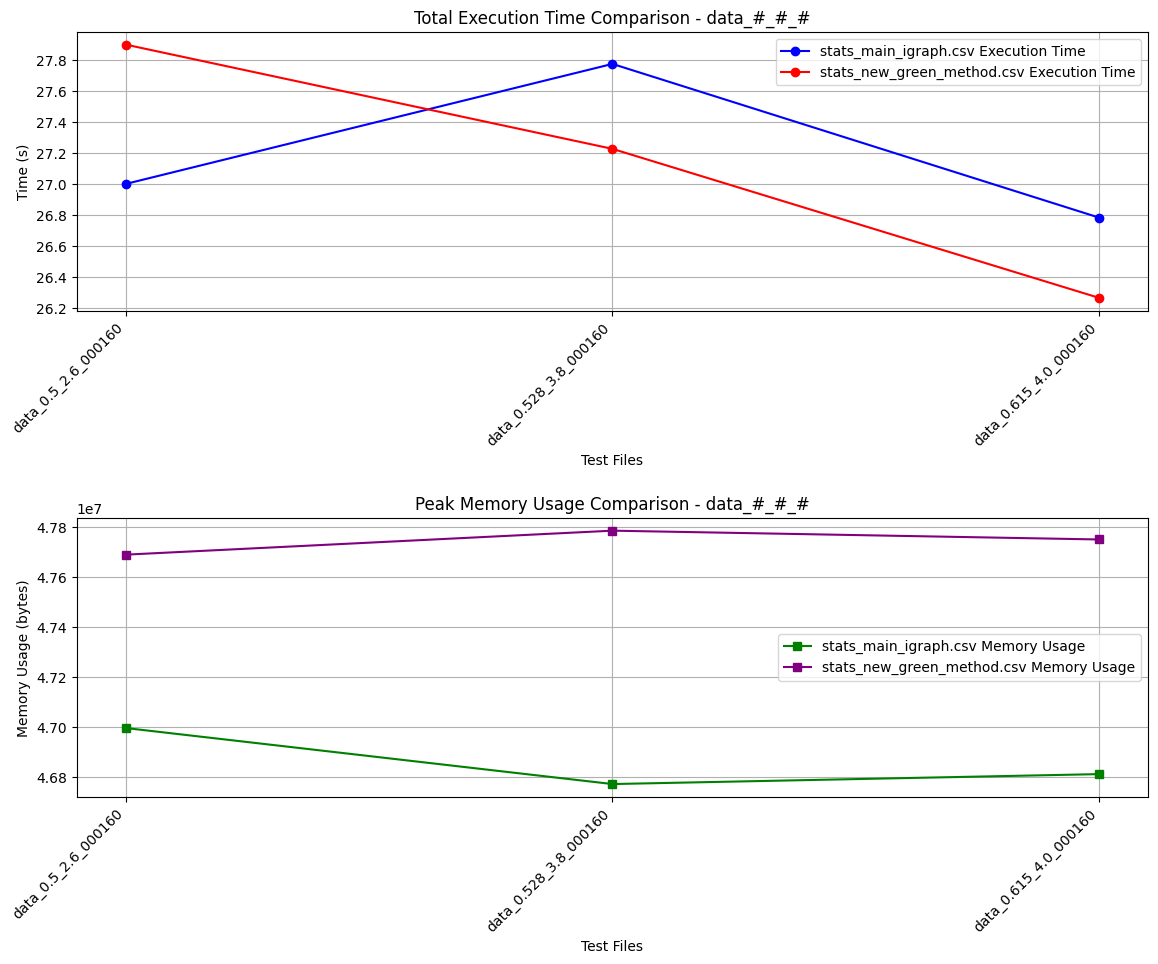

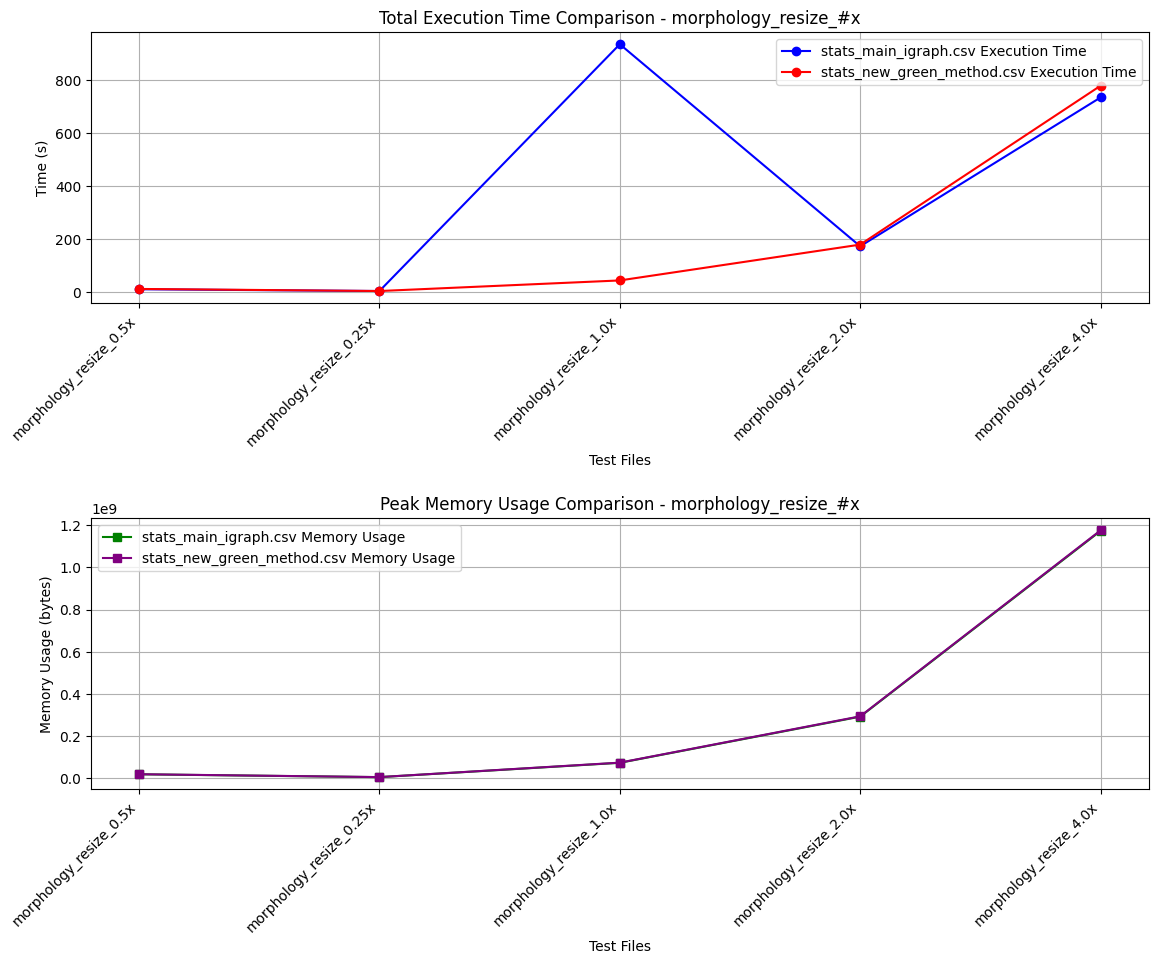

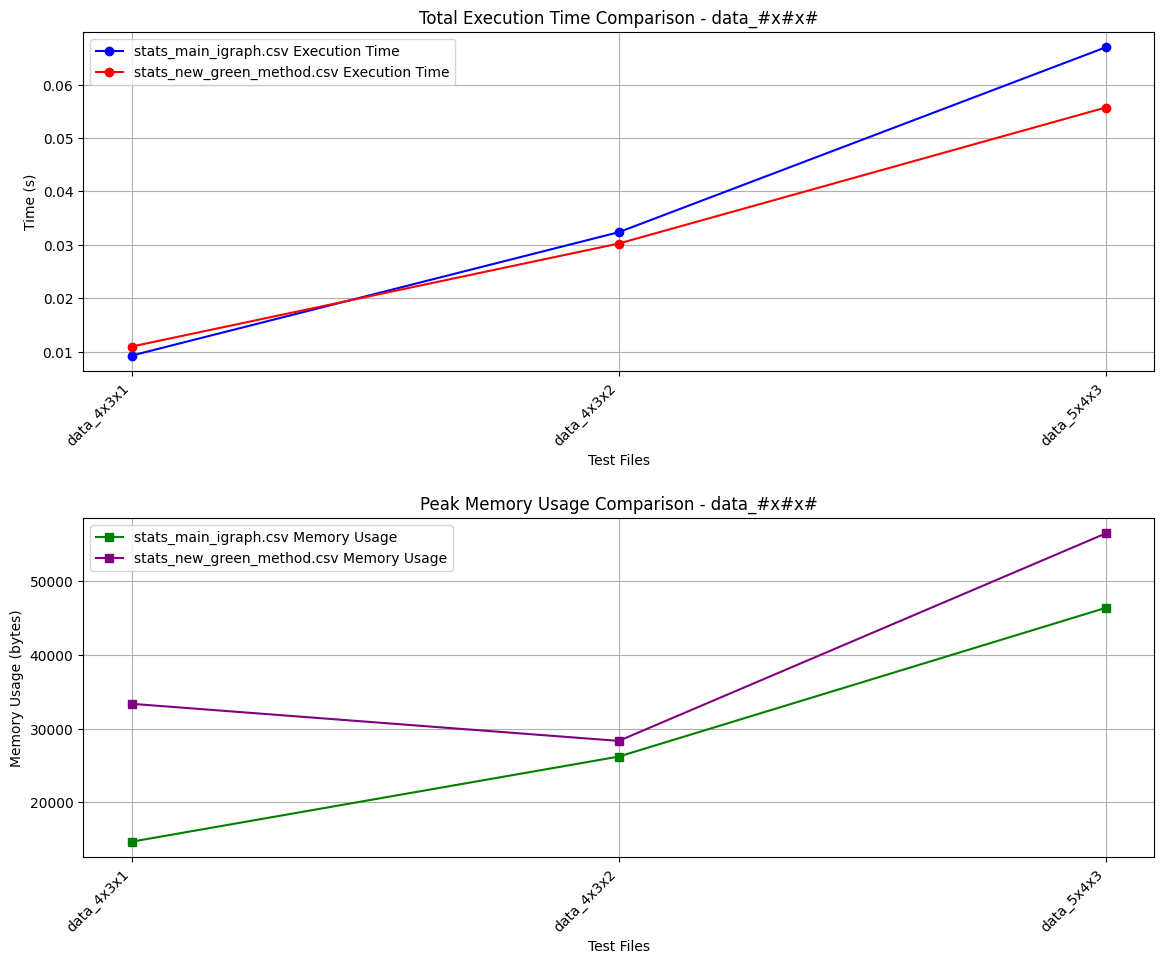

In [30]:
plot_total_execution_and_memory_compare('stats_main_igraph.csv', 'stats_new_green_method.csv')